In [11]:
pip install reparo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: C:\Users\prodi\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import reparo 

 ### Imported the dataset


In [24]:
df = pd.read_csv('HousingData.csv')
##df['MEDV']=[int(i) for i in df['MEDV']]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## step 2: Create a (bar) plot that will show the number of missing values in every column.


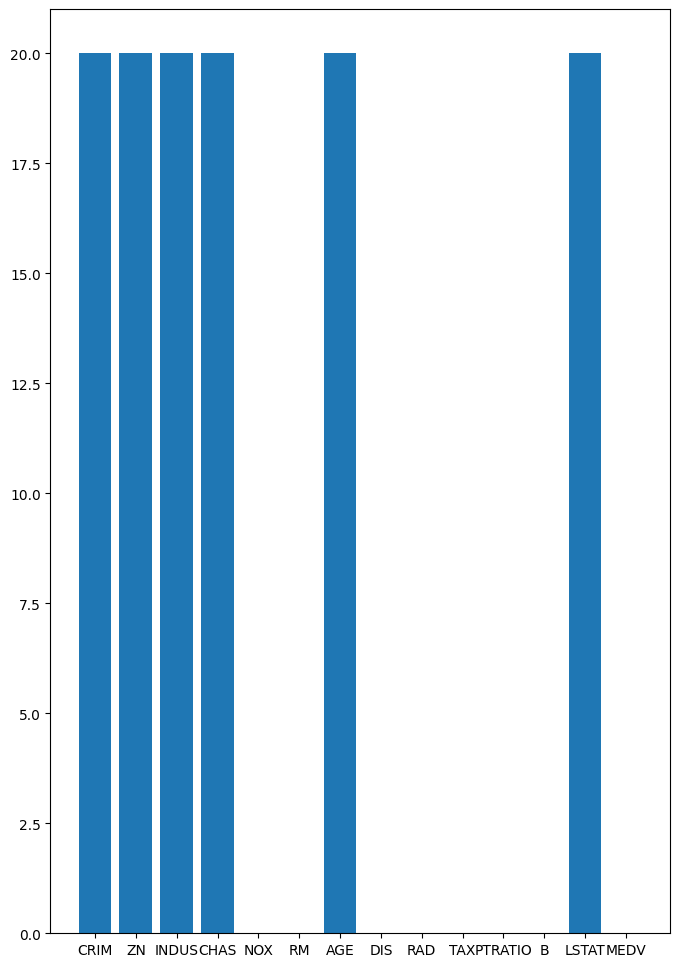

In [11]:
x,y=[i for i in df],df.isna().sum()
plt.bar(x,y)
plt.rcParams['figure.figsize'] = [8, 12]
plt.show()

## step 3: Split the data set into the train and test set.

In [12]:
X=df.drop(['MEDV'],axis=1)
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=427)

## step 4-14: Create the instaces

In [13]:
imputers = {
    'imputer_mean': SimpleImputer(strategy='mean'),
    'imputer_median': SimpleImputer(strategy='median'),
    'imputer_most_frequent': SimpleImputer(strategy='most_frequent'),
    'imputer_constant': SimpleImputer(strategy='constant', fill_value=0),
    'imputer_cdi': reparo.CDI(),
    'imputer_frnni': reparo.FRNNI(),
    'imputer_hdi': reparo.HotDeckImputation(),
    'imputer_knn': reparo.KNNImputer(),
    'imputer_pmm': reparo.PMM(),
    'imputer_mice': reparo.MICE()
}

## step 15: Train every imputer on the train data set.

In [14]:
imputed_datasets = {}
for imputer_name, imputer in imputers.items():
    imputed_datasets[imputer_name] = imputer.fit_transform(X_train.values)

## step 16: Fill in the missing values on the train and test subset.

In [15]:
imputed_test_datasets = {}
for imputer_name, imputer in imputers.items():
    imputed_test_datasets[imputer_name] = imputer.fit_transform(X_test.values)

## step 17-18: Train the following models on every set that you got after imputing the missing values:
    - Logistic Regression.
    - Gaussian Naive Bayes.
    - TreeDecisionClassifier.
    - RandomForest.
    
 ## the tabel with accuracy score for each model

In [20]:
y_train

194    29.1
485    21.2
95     28.4
217    28.7
269    20.7
       ... 
98     43.8
389    11.5
64     33.0
331    17.1
290    28.5
Name: MEDV, Length: 404, dtype: float64

In [21]:
models = {
    'Linear Regression': LinearRegression(max_iter=1000),
    'Gaussian Naive Bayes': GaussianNB(),
    'Tree Decision Classifier': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier()
}
scaler = StandardScaler()


accuracy_table = pd.DataFrame(columns=['Imputation algorithm', 'Prediction algorithm', 'Accuracy'])

for imputer_name, imputed_data in imputed_datasets.items():
    for model_name, model in models.items():
        X_scaled = scaler.fit_transform(imputed_data)
        print(model_name)
        model.fit(X_scaled, y_train)
        imputed_test_data = imputed_test_datasets[imputer_name]
        y_pred = model.predict(imputed_test_data)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_table = pd.concat([
            accuracy_table,
            pd.DataFrame({
                'Imputation algorithm': [imputer_name],
                'Prediction algorithm': [model_name],
                'Accuracy': [accuracy]
            })
        ], ignore_index=True)

print("Accuracy Table:")
accuracy_table

NameError: name 'LinearRegression' is not defined